# Tutorial 4: Confidence Intervals via Bootstrapping

#### Lecture and Tutorial Learning Goals:
From this section, students are expected to be able to:

1. Define what a confidence interval is, and why we want to generate one.
2. Explain how the bootstrap sampling distribution can be used to create confidence intervals.
3. Write a computer script to calculate confidence intervals for a population parameter using bootstrapping.
4. Effectively visualize point estimates and confidence intervals.
5. Interpret and explain results from confidence intervals.
6. Discuss the potential limitations of these methods.

In [1]:
# Run this cell before continuing.
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
source("tests_tutorial_04.R")

── Attaching packages ────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




## 1. Steam Games

For the first part of this tutorial, we'll be working with a dataset that contains various attributes, including the name, original price, genre, and description, of over 40,000 different games available on Steam. Steam is a platform where video games (and some other types of applications) are distributed digitally. Essentially, Steam acts as a digital game store and library. Although this particular dataset was compiled in 2019, for this tutorial, we will assume we have data for the entire population for simplicity.


<img src="https://steamcdn-a.akamaihd.net/store/about/social-og.jpg" width=500>
<div style="text-align: center"><i>Image from <a href="https://store.steampowered.com/about/">store.steampowered.com</i></a></div><br>

This data set, like several of the others we have worked with so far, is included in the `datateachr` package under the object name `steam_games`. The original source of the data set can be found in the documentation (`?steam_games`). We are interested in calculating a **90% confidence interval** for the **median of the `original_price`** of the games in the population. Afterwards, we will interpret the confidence interval and, because we are lucky enough to have access to data for the entire finite population, we will calculate the true median and see whether it is captured by our confidence interval.

In [2]:
?steam_games

Warning message in seq_len(head.end.idx):
“first element used of 'length.out' argument”
ERROR while rich displaying an object: Error in seq_len(head.end.idx): argument must be coercible to non-negative integer

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_conte

**Question 1.0** 
<br> {points: 1}

Filter out all `NA` values from the variable we are interested in (`original_price`), and select only that column.

**Note:** the values of `original_price` are in $USD.

_Assign your data frame to an object called `steam_pop`._

In [3]:
### BEGIN SOLUTION
steam_pop <- 
    steam_games %>% 
    filter(!is.na(original_price)) %>% 
    select(original_price)
### END SOLUTION

head(steam_pop)

original_price
<dbl>
19.99
29.99
39.99
44.99
0.00
59.99


In [4]:
test_1.0()

Test passed 🥇
Test passed 🌈
Test passed 🎊
Test passed 🥇
Test passed 🥳
[1] "Success!"


**Question 1.1** 
<br> {points: 1}

Take a single random sample of size 40 from `steam_pop` using `rep_sample_n` and a seed of 2078. After taking the sample, ensure that only the `original_price` column is selected. (_Hint: you will need to ungroup before selecting the column_.)

_Assign your data frame to an object called `steam_sample`._

In [5]:
set.seed(2078)

### BEGIN SOLUTION
steam_sample <- 
    steam_pop %>% 
    rep_sample_n(reps = 1, size = 40, replace = FALSE) %>% 
    ungroup() %>% 
    select(original_price)
### END SOLUTION

head(steam_sample)

original_price
<dbl>
8.99
19.99
9.99
203.95
19.99
4.99


In [6]:
test_1.1()

Test passed 🥇
Test passed 🥳
Test passed 😀
Test passed 😀
Test passed 🎊
[1] "Success!"


**Question 1.2** 
<br> {points: 1}

Take 1500 bootstrap samples from `steam_sample` using `rep_sample_n` and a seed of 9844. Then, calculate the median of each sample (name this column `bootstrap_median`). Your final data frame should have a `replicate` column and a `bootstrap_median` column.

_Assign your data frame to an object called `steam_bootstrapped`._

In [7]:
set.seed(9844)

### BEGIN SOLUTION
steam_bootstrapped <- steam_sample %>% 
    rep_sample_n(reps = 1500, size = 40, replace = TRUE) %>% 
    group_by(replicate) %>% 
    summarize(bootstrap_median = median(original_price))
### END SOLUTION

head(steam_bootstrapped)

replicate,bootstrap_median
<int>,<dbl>
1,13.49
2,4.99
3,4.99
4,8.99
5,4.99
6,9.99


In [8]:
test_1.2()

Test passed 🎉
Test passed 🥳
Test passed 😀
Test passed 😀
Test passed 🥇
[1] "Success!"


**Question 1.3** 
<br> {points: 1}

Use the `summarize` and `quantile` functions to calculate a 90% confidence interval for the median. Use the 0.05th and 0.95th quantiles for the lower and upper bounds of the interval, respectively. Name the column containing the lower bound of the interval `ci_lower` and the upper bound `ci_upper`.

_Assign your data frame to an object called `steam_ci`._

In [9]:
### BEGIN SOLUTION
steam_ci <- steam_bootstrapped %>% 
    summarize(ci_lower = quantile(bootstrap_median, 0.05),
              ci_upper = quantile(bootstrap_median, 0.95))
### END SOLUTION
head(steam_ci)

ci_lower,ci_upper
<dbl>,<dbl>
4.99,12.49


In [10]:
test_1.3()

Test passed 🎊
Test passed 🎊
Test passed 😸
Test passed 🌈
Test passed 🥳
[1] "Success!"


### The `infer` package workflow for bootstrapping (and calculating confidence intervals)

As you may have seen in [ModernDive](https://moderndive.com/8-confidence-intervals.html#infer-workflow), there is an alternative workflow for generating bootstrap distributions and calculating confidence intervals. The benefits are outlined in [Section 8.4.2](https://moderndive.com/8-confidence-intervals.html#infer-workflow). However, to summarize, the main benefit is that it will allow us to use similar code for inference methods that we will learn about later on, so we can compare and transition from one method to another much easier. The general workflow for bootstrapping with the `infer` workflow is summarized in the chart below:

<img src="https://d33wubrfki0l68.cloudfront.net/e7a0c87bc2cf1c53724bff5b58ff74e80224aac2/7e5fe/images/flowcharts/infer/calculate.png
" width=400>
<div style="text-align: center"><i>Image from <a href="https://moderndive.com/8-confidence-intervals.html#infer-workflow">ModernDive</i></a></div><br>

Given a sample, in the `specify` step, you "specify" the variable in the sample that you are interested in. With `generate`, you "generate" the bootstrap samples (like using `rep_sample_n`). Then, with `calculate`, you "calculate" the statistic you are interested in for each re-sample (like using `group_by(replicate)` and then `summarize`).

Finally, you can use `get_confidence_interval` to calculate a confidence interval using our bootstrap distribution and quantiles (like using the `summarize` and `quantile` functions).

Let's re-do **question 1.2** and **question 1.3** using this new workflow for practice.

**Question 1.2 (with the `infer` workflow!)** 
<br> {points: 1}

Using the `infer` workflow, take 1500 bootstrap samples from `steam_sample` and calculate the **median** of each sample. Use the same seed as you did previously (9844) and the scaffolding provided below as a guide:

```r
steam_bootstrapped2 <- ... %>% 
    specify(response = ...) %>% 
    generate(type = "bootstrap", reps = ...) %>% 
    calculate(stat = "...")
```

_Assign your data frame to an object called `steam_bootstrapped2`._

In [11]:
set.seed(9844) # DO NOT CHANGE

### BEGIN SOLUTION
steam_bootstrapped2 <- steam_sample %>% 
    specify(response = original_price) %>% 
    generate(type = "bootstrap", reps = 1500) %>% 
    calculate(stat = "median")
### END SOLUTION
head(steam_bootstrapped2)

replicate,stat
<int>,<dbl>
1,13.49
2,4.99
3,4.99
4,8.99
5,4.99
6,9.99


In [12]:
test_1.2_infer()

Test passed 🎉
Test passed 🥳
Test passed 😀
Test passed 😀
Test passed 🥇
[1] "Success!"


**Question 1.3 (with the `infer` workflow)** 
<br> {points: 1}

Use the `get_confidence_interval` function with the bootstrap distribution you just generated (`steam_bootstrapped2`) to calculate a 90% confidence interval for the median. Use the scaffolding provided below as a guide:

```r
steam_ci2 <- steam_bootstrapped2 %>% 
    get_confidence_interval(level = ..., type = "percentile")

```

**Note:** you can also use the function `get_ci`, which is the same as the function `get_confidence_interval`, but it is much more concise. Try replacing `get_confidence_interval` with `get_ci`, and the result will be the same!

_Assign your data frame to an object called `steam_ci2`._

In [13]:
### BEGIN SOLUTION
steam_ci2 <- steam_bootstrapped2 %>% 
    get_confidence_interval(level = 0.90, type = "percentile")
### END SOLUTION
steam_ci2

lower_ci,upper_ci
<dbl>,<dbl>
4.99,12.49


In [14]:
test_1.3_infer()

Test passed 🎊
Test passed 🎊
Test passed 😸
Test passed 🌈
Test passed 🥳
[1] "Success!"


**Question 1.4**
<br> {points: 1}

Visualize the confidence interval (`steam_ci2`) with two `geom_vline` layers on top of the bootstrap distribution (`steam_bootstrapped2`) using `geom_histogram` with bin widths of 5. Use the scaffolding provided below as a guide:

```r
steam_ci_plot <- steam_bootstrapped2 %>% 
    ggplot(aes(x = ...)) +
    ...(binwidth = ...) +
    ...(xintercept = steam_ci[[1]]) +
    ...(xintercept = ...)
```

_Assign your plot to an object called `steam_ci_plot`._

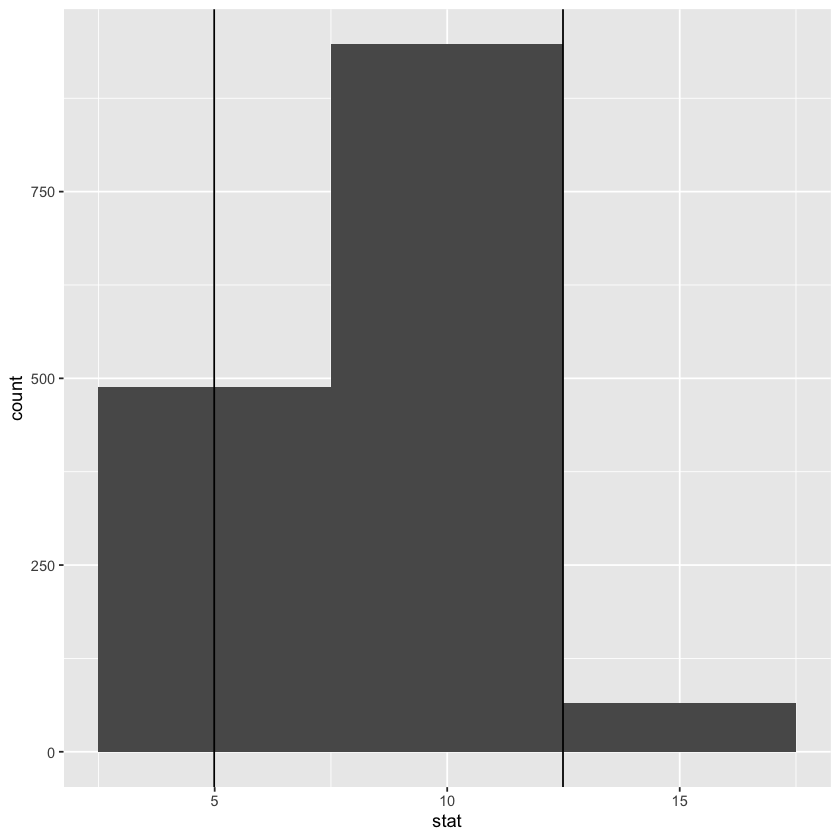

In [15]:
### BEGIN SOLUTION
steam_ci_plot <- steam_bootstrapped2 %>% 
    ggplot(aes(x = stat)) +
    geom_histogram(binwidth = 5) +
    geom_vline(xintercept = steam_ci[[1]]) +
    geom_vline(xintercept = steam_ci[[2]])
### END SOLUTION
steam_ci_plot

In [16]:
test_1.4()

Test passed 🎊
Test passed 😀
Test passed 🎊
Test passed 🥇
Test passed 🥇
Test passed 😸
[1] "Success!"


**Question 1.5** 
<br> {points: 3}

Consider the effectiveness of the plot above. If you think the plot is effective, list **at least** three reasons why. Otherwise, list **at least** three things that you would change about the plot to make it more effective.

### BEGIN SOLUTION
Overall, the plot is ineffective. Some things to change may include:
1. Decrease the size of the bins so the underlying bootstrap distribution is more apparent.
2. Add a descriptive title.
3. Add a descriptive x-axis.
4. Make the boundaries of the confidence interval more apparent, perhaps by either
    - Changing the colours of the vertical lines (and perhaps increase the thickness)
    - Changing the colours of the histogram bars
    - Add a transluscent rectangle spanning the y-axis and the confidence interval that contrasts with the histogram bars
    - Label the boundaries of the confidence interval
5. Add more breaks to the x-axis scale to make it easier to estimate values between the breaks.

### END SOLUTION

**Question 1.6** 
<br> {points: 1}

Calculate the median of the population `steam_pop`.

_Assign your answer to an object called `steam_median`. Your answer should be a single number._

In [17]:
### BEGIN SOLUTION
steam_median <- steam_pop %>% 
    pull(original_price) %>% 
    median()
### END SOLUTION
steam_median

[1] 4.99

In [18]:
test_1.6()

Test passed 🌈
Test passed 🎉
Test passed 🎉
[1] "Success!"


**Question 1.7**
<br>{points: 1}

True or false?

The confidence interval `steam_ci` captures the parameter of interest.

_Assign your answer to an object called `answer1.7`. Your answer should be either "true" or "false", surrounded by quotes._

In [19]:
# answer1.7 <- ...

### BEGIN SOLUTION
answer1.7 <- "true"
### END SOLUTION

In [20]:
test_1.7()

Test passed 🥇
Test passed 🥳
Test passed 🎉
[1] "Success!"


**Question 1.8**
<br>{points: 1}

Suppose you repeated the process above and took 100 more samples and calculated a 90% cofidence interval for each sample. How many of the 100 intervals would you expect to capture the true median of the population?

_Assign your answer to an object called `answer1.8`. Your answer should be a single integer._

In [21]:
# answer1.8 <- ...

### BEGIN SOLUTION
answer1.8 <- 90
### END SOLUTION

In [22]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "answer1.8"', {
  expect_true(exists("answer1.8"))
})
answer_as_numeric <- as.numeric(answer1.8)
test_that("Solution should be a number", {
  expect_false(is.na(answer_as_numeric))
})
test_that("Solution should be an integer", {
  expect_true(answer_as_numeric %% 1 == 0)
})
### BEGIN HIDDEN TESTS
test_that("Solution is incorrect", {
  expect_equal(digest(answer_as_numeric), "ccff14b67a1584858596ab658dbc1e4d")
})
print("Success!")
### END HIDDEN TESTS

Test passed 😸
Test passed 🎉
Test passed 🥳
Test passed 🎊
[1] "Success!"


## 2. Breast Cancer Diagnosis

In this section, we'll be working with a sample of characteristics of the cell nuclei of various breast masses. The data originates from University of Wisconsin Hospital, where a physician named Dr. William H. Wolberg obtained samples of breast lumps (or tumors) using a fine needle aspiration (FNA) biopsy. Images of the samples were digitized to compute the characteristics of the nuclei that you can find in the sample to work towards Dr. Wolberg's original goal of diagnosing new tumours mathematically using only a single FNA [(he was quite successful!)](https://www.pnas.org/content/87/23/9193.short). In the sample, the nuclei characteristics have been paired with the ultimate diagnosis of the mass (benign or malignant).

<img src="http://pages.cs.wisc.edu/~street/saves/xcyt1.gif
" width=500>
<div style="text-align: center">A screenshot from Xcyt, a program that was developed by Dr. Wolberg for breast mass diagnoses using these data.<br><i>Image from <a href="https://moderndive.com/8-confidence-intervals.html#infer-workflow">pages.cs.wisc.edu</i></a></div><br>

This sample is located in the `datateachr` package, and is named `cancer_sample`. We are  interested in estimating the **proportion of the patients from the population whose breast masses are malignant** (`diagnosis == "M"`).

In [23]:
# Run this cell before continuing.
head(cancer_sample)

ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


**Question 2.0**
<br>{points: 3}

Describe the population from which the sample `cancer_sample` was drawn from.

**Note:** this question has a fairly wide range of acceptable answers!

### BEGIN SOLUTION
This question has a wide range of acceptable answers. Your answer depends on which group you suspect this sample is representative of (this is unclear). Here are two examples:
1. The population is the set of all people in the world with breast lumps, assuming that the sample is representative of this group. 
2. More realistically, perhaps the population is the set of all people in the United States with breast lumps, assuming that the sample is representative of this group.

Regardless, there must be some mention of set of all **people with breast lumps** for full credit.
### END SOLUTION

**Question 2.1**
<br>{points: 3}

Use the `infer` package workflow to calculate an 80% confidence interval for the proportion with malignant breast masses (`diagnosis == "M"`), using bootstrapping with 1000 replicates. Set your seed to 8943. Your final dataframe should have a single row and two columns named `lower_ci` and `upper_ci`.

**Hint:** If you're stuck, don't be afraid to explore the [documentation for the `infer` package](https://cran.r-project.org/web/packages/infer/infer.pdf), peek at [Section 8.5 of ModernDive](https://moderndive.com/8-confidence-intervals.html#one-prop-ci), or ask someone for help! You can use your code from the previous section as a blueprint.

_Assign your data frame to an object called `cancer_ci`._

In [24]:
set.seed(8943) # DO NOT CHANGE!

### BEGIN SOLUTION
cancer_ci <- cancer_sample %>% 
    specify(response = diagnosis, success = "M") %>% 
    generate(type = "bootstrap", reps = 1000) %>% 
    calculate(stat = "prop") %>% 
    get_ci(type = "percentile", level = 0.80)
### END SOLUTION
cancer_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.3478032,0.397188


In [25]:
test_2.1()

Test passed 😀
Test passed 🌈
Test passed 🥳
Test passed 😀
Test passed 😸
[1] "Success!"


**Question 2.2**
<br>{points: 3}

Does the confidence interval capture the population parameter we are interested in? If there is no way to determine this for certain, explain why that is the case.

### BEGIN SOLUTION
There is no way to know for certain whether our confidence interval captures the true parameter because we do not have access to data for the entire population.
### END SOLUTION

**Question 2.3**
<br>{points: 3}

In 1-2 sentences, explain one way you can interpret the confidence interval you calculated above (`cancer_ci`).

### BEGIN SOLUTION
**Solution 1:** We are 80% confident that the true proportion of individuals in our population with malignant breast lumps is captured by the confidence interval (0.3478032, 0.397188).

**Solution 2:** Out of all possible confidence intervals with a confidence level of 80% that we could calculate for the proportion of individuals in the population with malignant breast lumps, the proportion of intervals that would contain the true population proportion is 0.80.
### END SOLUTION

**Question 2.4**
<br>{points: 1}

Suppose you calculated another 80% confidence interval for the population proportion, but with a sample that was 5 times larger than `cancer_sample`. How would you expect this second interval compare to the first confidence interval you calculated above (`cancer_ci`)?

A. The second confidence interval would likely be narrower than the first.

B. The second confidence interval would likely be about the same width as the first.

C. The second confidence interval would likely be wider than the first.

D. There is no way to tell how the second interval would compare to the first.

_Assign your answer to an object called `answer2.4`. Your answer should be a single character surrounded by quotes._

In [26]:
# answer2.4 <- ...

### BEGIN SOLUTION
answer2.4 <- "A"
### END SOLUTION

In [27]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "answer2.4"', {
  expect_true(exists("answer2.4"))
})
test_that('Solution should be a single character ("A", "B", "C", or "D")', {
  expect_match(answer2.4, "a|b|c|d", ignore.case = TRUE)
})
### BEGIN HIDDEN TESTS
test_that("Solution is incorrect", {
  expect_equal(digest(tolower(answer2.4)), "127a2ec00989b9f7faf671ed470be7f8")
})
print("Success!")
### END HIDDEN TESTS

Test passed 🎊
Test passed 🥇
Test passed 😀
[1] "Success!"


## 3. Bow River at Banff: 100-Year Flood

Sample quantiles, like the other statistics we have introduced such as the sample mean and standard deviation, can also be considered as a point estimate of a population parameter. Meaning, quantiles can be used to describe the distribution of a quantitative variable of a population; each distribution has a unique 0.4 quantile, 0.93 quantile, and so on. One common usage of quantiles is to estimate N-year floods. An N-year flood is defined as smallest possible severety for a flood that we **expect** to occur once every N years (but could occur more or less than once in any given N-year span). To calculate a point estimate N-year flood, one must find a quantile such that $\frac{1}{N}$ known observations fall above it. Also, like the other population parameters we have mentioned, we can also calculate a **confidence interval** for this parameter, which is what we will be doing in this section.


In 2013, a combination of factors lead to the Bow River reaching very high flow rates (466 ${\text{m}^3}/{\text{s}}$ near Banff), which contributed to extreme flooding throughout Alberta, the Canadian province that lies directly east of British Columbia. One photograph of the event is shown above. For many years the Government of Canada has been collecting hydrometric data at many different stations for several rivers, including the Bow River. So, what's the least severe flood due to high Bow River flow rates that Albertans can expect every 100 years? To answer this question, our goal is calculate a **95% confidence interval for the 100-year flood** (the $1 - \frac{1}{100} = 0.99$ quantile) using the **maxima** flow rate data collected at the Banff Bow River station, recorded in ${\text{m}^3}/{\text{s}}$. This data is located [here](https://wateroffice.ec.gc.ca/report/historical_e.html?stn=05BB001&dataType=Annual+Extremes&parameterType=Flow&year=2018&mode=Table) but we have already tidied the data for you and included it in the `datateachr` package under the name `flow_sample`.

`flow_sample` contains information about the maximum _and_ minimum flow rates for each year, so we need to filter the data set for **flow maxima**. We have done this for you in the cell below:

In [28]:
# Run this cell before continuing.
flow_sample <- flow_sample %>% 
    filter(extreme_type == "maximum")

head(flow_sample)

station_id,year,extreme_type,month,day,flow,sym
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
05BB001,1909,maximum,7,7,314,NA
05BB001,1910,maximum,6,12,230,NA
05BB001,1911,maximum,6,14,264,NA
05BB001,1912,maximum,8,25,174,NA
05BB001,1913,maximum,6,11,232,NA
05BB001,1914,maximum,6,18,214,NA


**Question 3.0**
<br>{points: 3}

The data contained in `flow_sample` is considered a sample. Describe the population from which the sample was drawn from.

**Note:** there may more than one solution to this question depending on how one interprets "population".

### BEGIN SOLUTION
One solution could be: You could say the population is the set of all possible years. Or, at least all the years for which the river is in existence.
### END SOLUTION

**Question 3.1**
<br>{points: 3}

Use the `infer` package workflow to generate bootstrap distribution of the appropriate sample quantiles for `flow_sample` using 3000 bootstrap replicates. Set your seed to 4629. Your final dataframe should have the columns `replicate` and `stat`.

**IMPORTANT NOTE:** because the `calculate` function does not support using quantiles as the sample statistic, here we have to use the `summarize` function. Thus, in place of the line where you would usually use `calculate` with the `infer` package workflow, you can use the following line:

```r
    ... %>%
    summarize(stat = quantile(flow, probs = 0.99))
```

_Assign your data frame to an object called `flow_bootstrapped`._

In [29]:
set.seed(4629) # DO NOT CHANGE!

### BEGIN SOLUTION
flow_bootstrapped <- flow_sample %>% 
    specify(response = flow) %>% 
    generate(type = "bootstrap", reps = 3000) %>% 
    summarize(stat = quantile(flow, probs = 0.99))
### END SOLUTION
head(flow_bootstrapped)

replicate,stat
<int>,<dbl>
1,456.32
2,345.00
3,345.00
4,330.80
5,458.88
6,342.52


In [30]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "flow_bootstrapped"', {
  expect_true(exists("flow_bootstrapped"))
})
test_that("Solution should be a data frame", {
  expect_true("data.frame" %in% class(flow_bootstrapped))
})
### BEGIN HIDDEN TESTS
expected_colnames <- c("replicate", "stat")
given_colnames <- colnames(flow_bootstrapped)
test_that("Data frame does not have the correct columns", {
  expect_equal(length(setdiff(
    union(expected_colnames, given_colnames),
    intersect(expected_colnames, given_colnames)
  )), 0)
})

test_that("Data frame does not contain the correct number of rows", {
  expect_equal(digest(as.integer(nrow(flow_bootstrapped))),
               "b5458e3b37771063dd9f7160eb1e653f")
})

test_that("Data frame does not contain the correct data", {
  expect_equal(digest(as.integer(sum(flow_bootstrapped$stat) * 1000)),
               "344980685a9b498b9a0c9b5facc1b81d")
})

print("Success!")
### END HIDDEN TESTS

Test passed 🎉
Test passed 🎉
Test passed 🎉
Test passed 🎉
Test passed 🎉
[1] "Success!"


**Question 3.2**
<br>{points: 3}

Use the appropriate function from the `infer` package to calculate a 95% confidence interval for the 100-year flood from the bootstrap distribution you just generated. Your final dataframe should have a single row and two columns named `lower_ci` and `upper_ci`.

_Assign your data frame to an object called `flow_ci`._

In [31]:
### BEGIN SOLUTION
flow_ci <- flow_bootstrapped %>% 
    get_ci(type = "percentile", level = 0.95)
### END SOLUTION
head(flow_ci)

lower_ci,upper_ci
<dbl>,<dbl>
313.92,466


In [32]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "flow_ci"', {
  expect_true(exists("flow_ci"))
})
test_that("Solution should be a data frame", {
  expect_true("data.frame" %in% class(flow_ci))
})
### BEGIN HIDDEN TESTS
expected_colnames <- c("lower_ci", "upper_ci")
given_colnames <- colnames(flow_ci)
test_that("Data frame does not have the correct columns", {
  expect_equal(length(setdiff(
    union(expected_colnames, given_colnames),
    intersect(expected_colnames, given_colnames)
  )), 0)
})

test_that("Data frame does not contain the correct number of rows", {
  expect_equal(digest(as.integer(nrow(flow_ci))),
               "4b5630ee914e848e8d07221556b0a2fb")
})

test_that("Data frame does not contain the correct data", {
  expect_equal(digest(as.integer(flow_ci$lower_ci * 1000)),
               "6c75c5f700980e8e22a49f34a39f3578")
  expect_equal(digest(as.integer(flow_ci$upper_ci * 1000)),
               "18fd33d2daf5aac2f135ef8a7da79317")
})

print("Success!")
### END HIDDEN TESTS

Test passed 🥳
Test passed 🌈
Test passed 😀
Test passed 😸
Test passed 🥳
[1] "Success!"


**Question 3.3**
<br> {points: 3}

Create an **effective** visualization of the confidence interval `flow_ci` and its associated bootstrap distribution `flow_bootstrapped`. Use whichever layers and arguments you wish. 

**Hint:** if you want some inspiration, check out https://www.r-graph-gallery.com/index.html!

_Assign your plot to an object called `flow_ci_plot`._

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


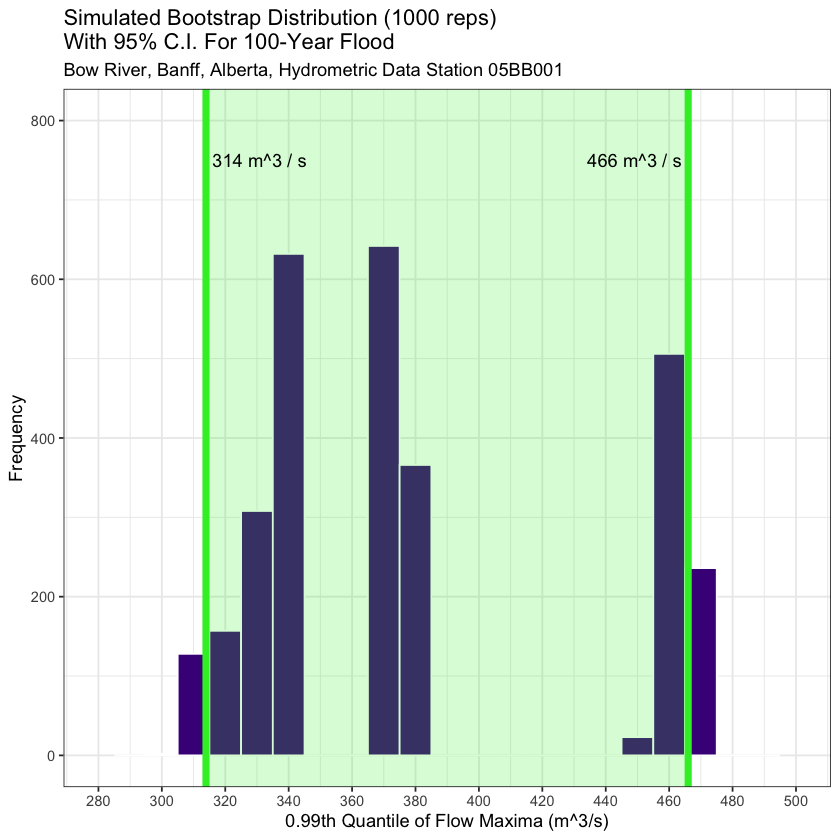

In [33]:
### BEGIN SOLUTION

# Students should at LEAST implement the three changes they suggested for the
# first confidence interval plot that they mentioned in question 1.5
# (1 point for each change mentioned there)

# There may be some other unique ways to display the confidence interval that
# would also get full points so long as they convey the story well

steam_ci_plot <- flow_bootstrapped %>% 
    ggplot(aes(x = stat)) +

    # Use a more appropriate bin width
    # Outline histogram bars
    # Use contrasting, colour-blind friendly colours for histogram bars + lines
    geom_histogram(binwidth = 10, fill = "#480087", colour = "white") +

    # Increase width of CI boundary lines
    geom_vline(xintercept = flow_ci[[1]], colour = "#2fed2f", size = 2) +
    geom_vline(xintercept = flow_ci[[2]], colour = "#2fed2f", size = 2) +

    # Add a rectangle annotation to emphasize CI bounds
    annotate("rect",
             xmin = flow_ci[[1]], xmax = flow_ci[[2]],
             ymin = -Inf, ymax = Inf,
             fill = "#2fed2f",
             alpha = 0.2) +

    # Make room for CI boundary labels
    scale_y_continuous(limits = c(0, 800)) +

    # Increase readability of x-axis
    scale_x_continuous(limits = c(280, 500), breaks = seq(200, 600, 20)) +

    # Labels boundaries of CI
    annotate("text",
             x = flow_ci[[1]] + 2,
             y = 750,
             hjust = 0,
             label = paste(round(flow_ci[[1]]), "m^3 / s")) +
    annotate("text",
             x = flow_ci[[2]] - 2,
             y = 750,
             hjust = 1,
             label = paste(round(flow_ci[[2]]), "m^3 / s")) +

    # Add descriptive labels & titles
    labs(title = "Simulated Bootstrap Distribution (1000 reps)\nWith 95% C.I. For 100-Year Flood",
         subtitle = "Bow River, Banff, Alberta, Hydrometric Data Station 05BB001",
         x = "0.99th Quantile of Flow Maxima (m^3/s)",
         y = "Frequency") +

    # Change theme for further contrast
    theme_bw()
### END SOLUTION
steam_ci_plot

_Use your plot above to help you answer the **next 3 questions**._

**Question 3.4**
<br>{points: 1}

True or false?

There is a 50% chance that the true 100-year flood value is captured by the confidence interval `flow_ci`.

_Assign your answer to an object called `answer3.4`. Your answer should be either "true" or "false", surrounded by quotes._

In [34]:
# answer3.4 <- ...

### BEGIN SOLUTION
answer3.4 <- "false"
### END SOLUTION

In [35]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "answer3.4"', {
  expect_true(exists("answer3.4"))
})
test_that('Answer should be "true" or "false"', {
  expect_match(answer3.4, "true|false", ignore.case = TRUE)
})
### BEGIN HIDDEN TESTS
test_that("Solution is incorrect", {
  expect_equal(digest(tolower(answer3.4)),
               "d2a90307aac5ae8d0ef58e2fe730d38b")
})
print("Success!")
### END HIDDEN TESTS

Test passed 🎊
Test passed 🥳
Test passed 🥳
[1] "Success!"


**Question 3.5**
<br>{points: 1}

True or false?

We are 95% confident that the true 100-year flood value is captured by the confidence interval `flow_ci`.

_Assign your answer to an object called `answer3.5`. Your answer should be either "true" or "false", surrounded by quotes._

In [36]:
# answer3.5 <- ...

### BEGIN SOLUTION
answer3.5 <- "true"
### END SOLUTION

In [37]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "answer3.5"', {
  expect_true(exists("answer3.5"))
})
test_that('Answer should be "true" or "false"', {
  expect_match(answer3.5, "true|false", ignore.case = TRUE)
})
### BEGIN HIDDEN TESTS
test_that("Solution is incorrect", {
  expect_equal(digest(tolower(answer3.5)),
               "05ca18b596514af73f6880309a21b5dd")
})
print("Success!")
### END HIDDEN TESTS

Test passed 🎊
Test passed 😸
Test passed 🌈
[1] "Success!"


**Question 3.6**
<br>{points: 1}

True or false?

If we increased the confidence level of the confidence interval `flow_ci`, we would expect that it would become narrower.

_Assign your answer to an object called `answer3.6`. Your answer should be either "true" or "false", surrounded by quotes._

In [38]:
# answer3.6 <- ...

### BEGIN SOLUTION
answer3.6 <- "false"
### END SOLUTION

In [39]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "answer3.6"', {
  expect_true(exists("answer3.6"))
})
test_that('Answer should be "true" or "false"', {
  expect_match(answer3.6, "true|false", ignore.case = TRUE)
})
### BEGIN HIDDEN TESTS
test_that("Solution is incorrect", {
  expect_equal(digest(tolower(answer3.6)),
               "d2a90307aac5ae8d0ef58e2fe730d38b")
})
print("Success!")
### END HIDDEN TESTS

Test passed 🥳
Test passed 🎉
Test passed 🎉
[1] "Success!"
